<a href="https://colab.research.google.com/github/sushma-snk/Color-Identification-using-K-means-Clustering/blob/main/ColorIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

from collections import Counter
import os

%matplotlib inline

Load Image

Shape: (1050, 960, 3)


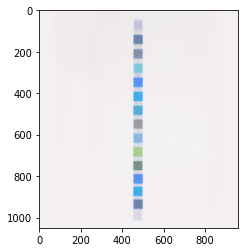

In [ ]:
img = cv2.imread('/gdrive/My Drive/AccordInnovationsPvtLtd_Assignment/U14.png')
print("Shape: {}".format(img.shape))
plt.imshow(img)

Convert BGR to RGB format

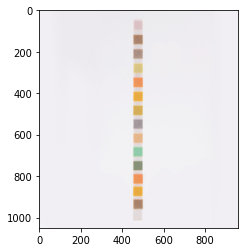

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Define a function to convert RGB to Hex

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Reshape the image

In [ ]:
img=img.reshape((img.shape[1]*img.shape[0],3))

# Implementing k-means clustering

Elbow method to determine the optimal k value

In [ ]:
md=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(img)
  o=kmeans.inertia_
  md.append(o)
print(md)

[692710283.8333577, 123194372.55267309, 84605958.32441986, 50035731.49215895, 37123899.478229634, 27729410.72868158, 21335970.497771293, 18282141.002606623, 15883033.49286362, 13370830.748242056, 11732492.294702431, 10571497.88130346, 9473218.44871827, 8658146.80024598]


Plot inertia values with respect to each k

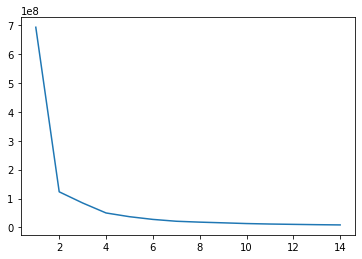

In [ ]:
plt.plot(list(np.arange(1,15)),md)
plt.show()

Implementing k-means algorithm

In [ ]:
clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(img)

Determining labels and centroids of the cluster

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

Plotting Pie Chart

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.patches.Wedge at 0x7f4f7eb65250>,
 [Text(-1.0897087774212821, 0.15011588993512526, '[240.16151216 238.50605346 242.9404995 ]'),
  Text(1.0732903540557341, -0.24093114346409664, '[165.29993049 143.17087581 126.15569972]'),
  Text(1.0877883882954178, -0.16345159004934007, '[156.83698577 197.05459439 171.65359477]'),
  Text(1.0941087788629602, -0.11369248002837452, '[233.06849598 165.42232309  82.80389932]'),
  Text(1.0988147671679744, -0.05105004851702233, '[225.72471613 213.32370418 210.76525269]'),
  Text(1.0999638569019674, -0.008917034784519795, '[225.5675     191.20216667 143.54733333]')])

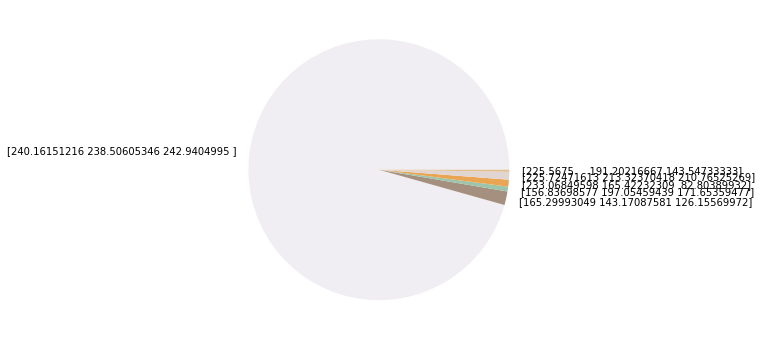

In [ ]:
plt.figure(figsize = (8, 8))
plt.pie(counts.values(), labels = rgb_colors, colors = hex_colors)

In [ ]:
matplotlib.pyplot.scatter()